In [9]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dataset.csv')

Saving dataset.csv to dataset (1).csv


In [14]:
# Separate features and target
target_column = 'classification'  # The target column - Number of instances from each class (malware/benign)
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Performing EDA

# 1. Display basic statistics for numerical features
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
print("Descriptive Statistics for Numerical Features:")
X[numerical_columns].describe()


Descriptive Statistics for Numerical Features:


millisecond         state  usage_counter          prio  \
count  100000.000000  1.000000e+05       100000.0  1.000000e+05   
mean      499.500000  1.577683e+05            0.0  3.069706e+09   
std       288.676434  9.361726e+05            0.0  2.963061e+05   
min         0.000000  0.000000e+00            0.0  3.069190e+09   
25%       249.750000  0.000000e+00            0.0  3.069446e+09   
50%       499.500000  0.000000e+00            0.0  3.069698e+09   
75%       749.250000  4.096000e+03            0.0  3.069957e+09   
max       999.000000  4.326605e+07            0.0  3.070222e+09   

         static_prio  normal_prio    policy  vm_pgoff  vm_truncate_count  \
count  100000.000000     100000.0  100000.0  100000.0      100000.000000   
mean    18183.900070          0.0       0.0       0.0       15312.739510   
std      4609.792765          0.0       0.0       0.0        3256.475008   
min     13988.000000          0.0       0.0       0.0        9695.000000   
25%     14352.000000          0.0       0.0       0.0       12648.000000   
50%     16159.000000          0.0       0.0       0.0       15245.000000   
75%     22182.000000          0.0       0.0       0.0       17663.000000   
max     31855.000000          0.0       0.0       0.0       27157.000000   

       task_size  ...         nivcsw        min_flt        maj_flt  \
count   100000.0  ...  100000.000000  100000.000000  100000.000000   
mean         0.0  ...      32.991160       2.053130     117.920240   
std          0.0  ...      52.730176      13.881382       3.116892   
min          0.0  ...       0.000000       0.000000     112.000000   
25%          0.0  ...       1.000000       0.000000     114.000000   
50%          0.0  ...       9.000000       1.000000     120.000000   
75%          0.0  ...      46.000000       1.000000     120.000000   
max          0.0  ...     365.000000     256.000000     120.000000   

       fs_excl_counter          lock          utime          stime  \
count    100000.000000  1.000000e+05  100000.000000  100000.000000   
mean          1.109190  3.204448e+09  385415.451970       4.059310   
std           2.160466  0.000000e+00   10144.036494       0.822848   
min           0.000000  3.204448e+09  371782.000000       3.000000   
25%           0.000000  3.204448e+09  378208.000000       3.000000   
50%           0.000000  3.204448e+09  383637.000000       4.000000   
75%           1.000000  3.204448e+09  390324.000000       5.000000   
max          18.000000  3.204448e+09  421913.000000       7.000000   

              gtime    cgtime  signal_nvcsw  
count  100000.00000  100000.0      100000.0  
mean        1.66142       0.0           0.0  
std         3.26304       0.0           0.0  
min         0.00000       0.0           0.0  
25%         0.00000       0.0           0.0  
50%         0.00000       0.0           0.0  
75%         1.00000       0.0           0.0  
max        15.00000       0.0           0.0  

[8 rows x 33 columns]

Number of instances in each class:
classification
malware    50000
benign     50000
Name: count, dtype: int64


<ipython-input-15-853e4de564ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


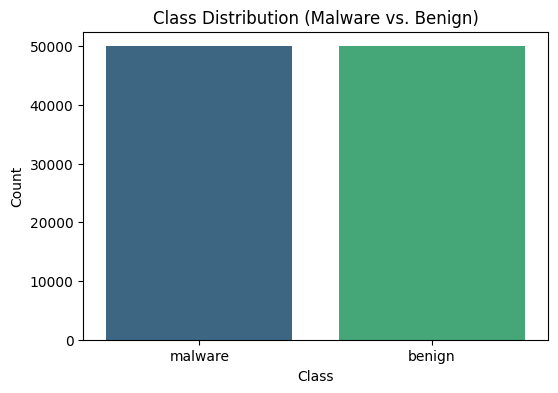

In [15]:

# Count the number of instances for each class
class_counts = y.value_counts()
print("Number of instances in each class:")
print(class_counts)


# 2. Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title("Class Distribution (Malware vs. Benign)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()




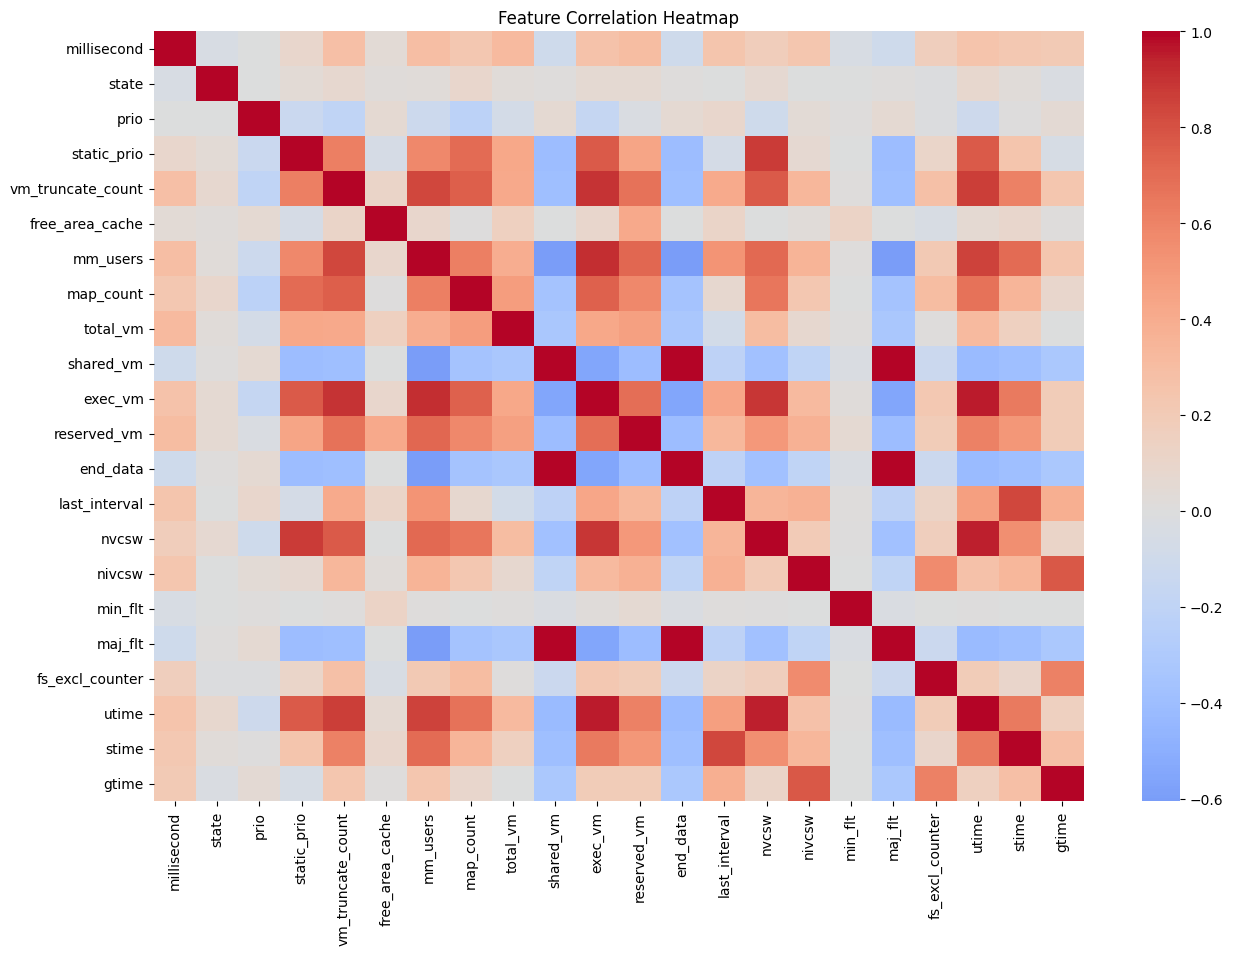

In [17]:
numerical_columns = list(numerical_columns)
for i in X.columns:
  if X[i].nunique() < 2:
    X.drop(columns=[i], inplace=True)
    numerical_columns.remove(i)


# 3. Correlation Heatmap for numerical features
correlation_matrix = X[numerical_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

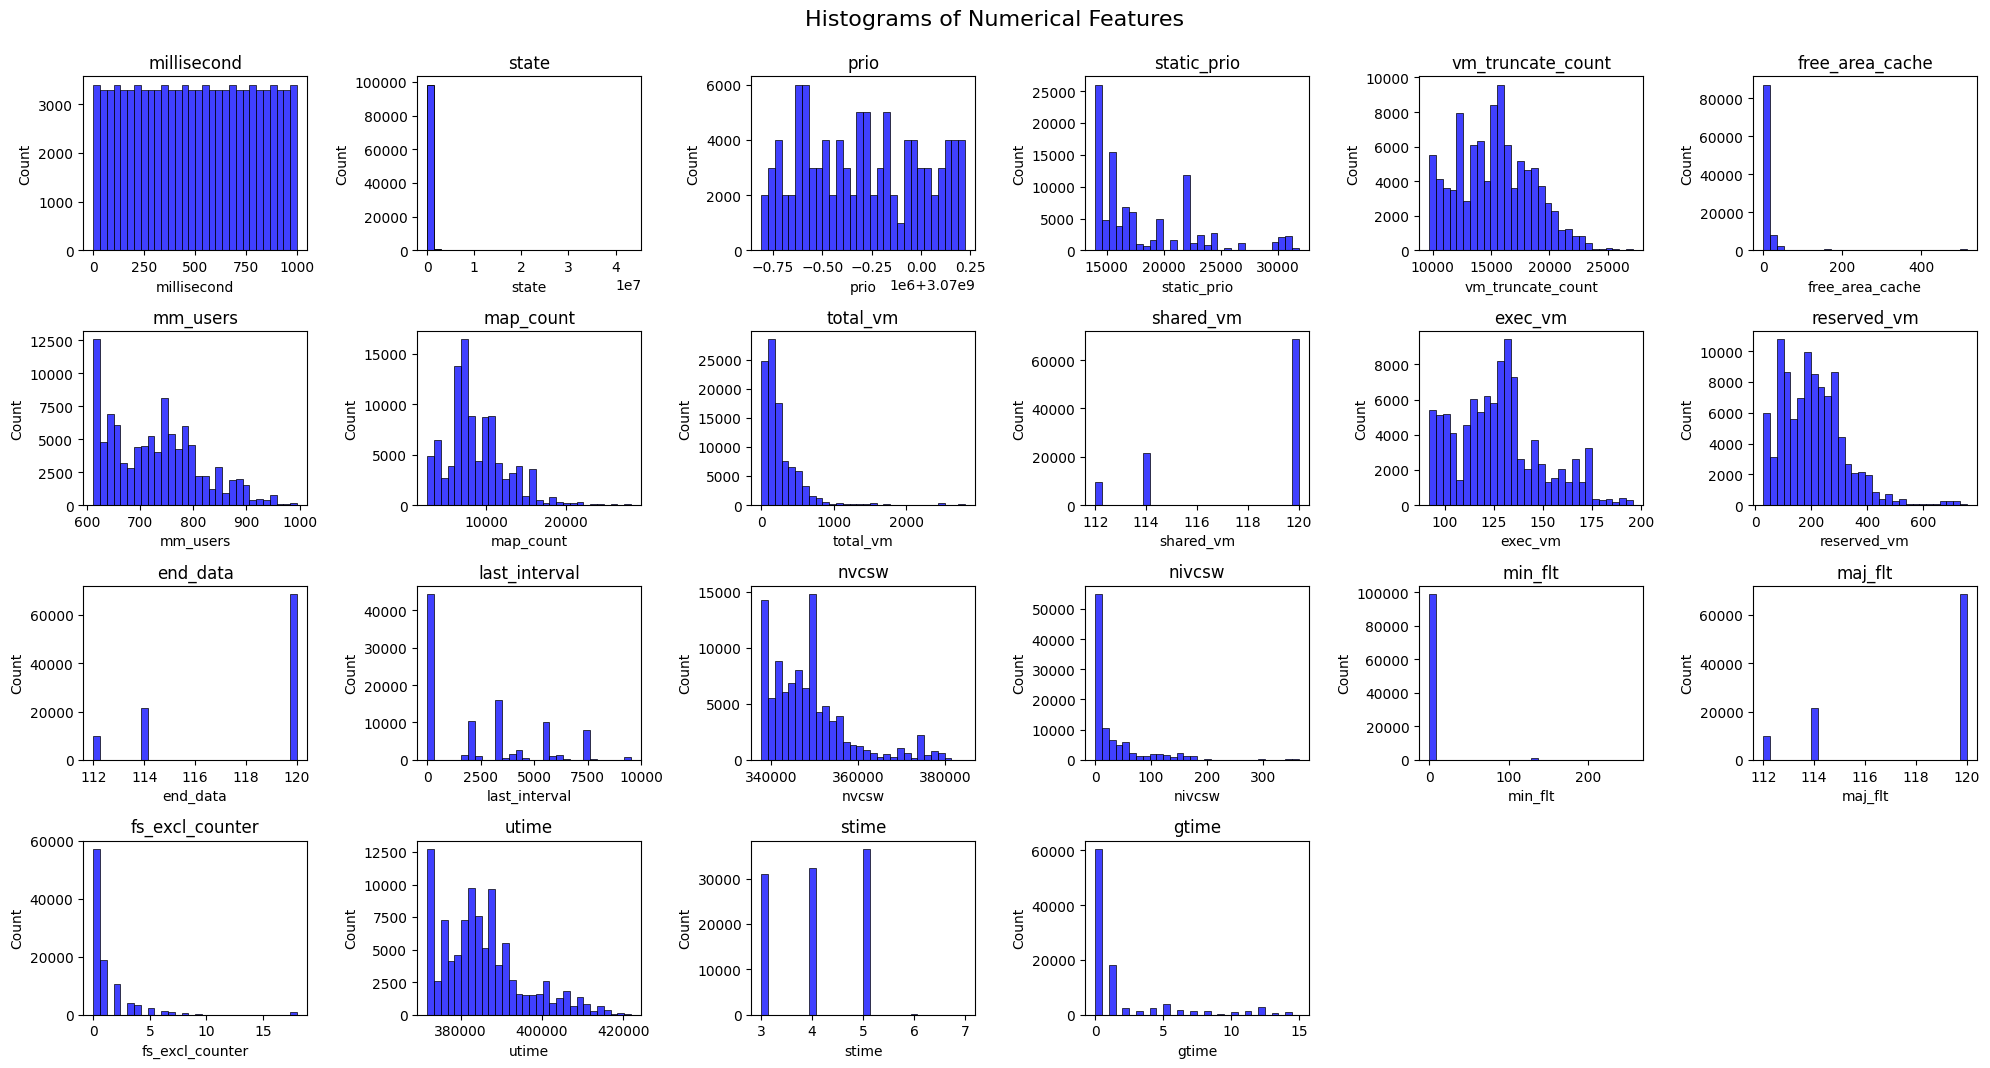

In [18]:
# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 6, i)  # Adjust the grid size based on the number of features
    sns.histplot(X[column], bins=30, kde=False, color='blue')
    plt.title(column)
    plt.tight_layout()  # Adjusts spacing to avoid overlap

plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)  # Add a main title
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[numerical_columns], y, test_size=0.2, random_state=42, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      benign       0.80      0.64      0.71     10000
     malware       0.70      0.84      0.76     10000

    accuracy                           0.74     20000
   macro avg       0.75      0.74      0.74     20000
weighted avg       0.75      0.74      0.74     20000



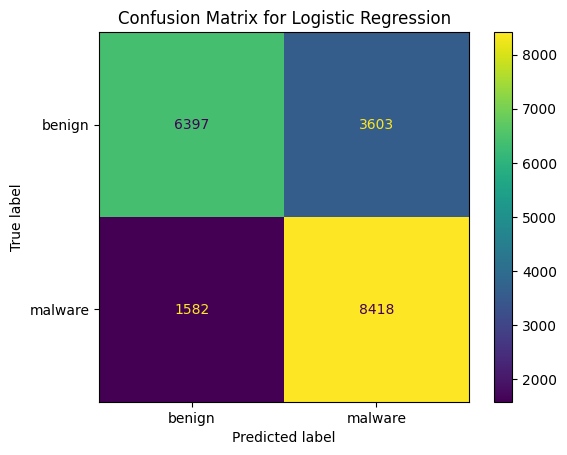

Classification Report for Random Forest:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



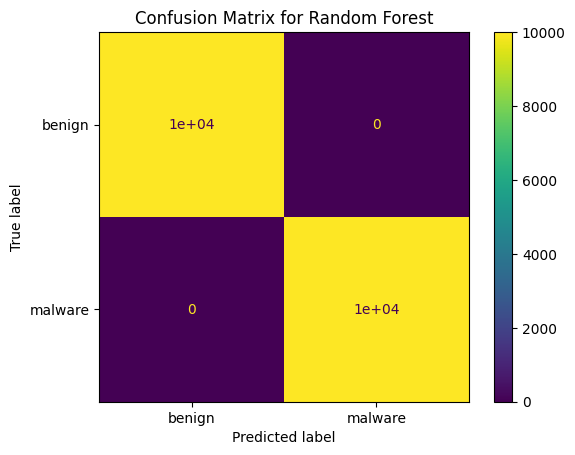

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



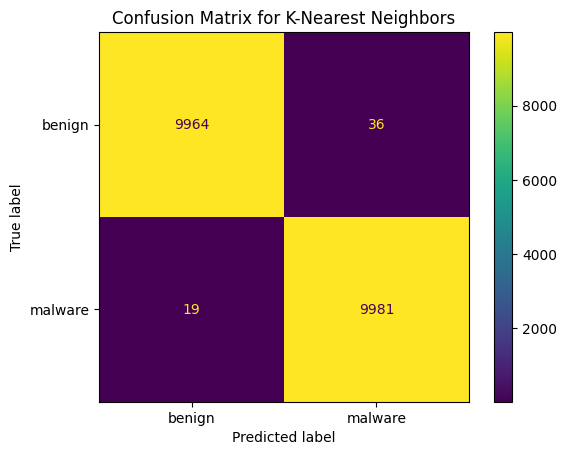

In [24]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the target variable if it's not numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifiers
log_reg.fit(X_train, y_train_encoded)
random_forest.fit(X_train, y_train_encoded)
knn.fit(X_train, y_train_encoded)

# Test the classifiers
log_reg_pred = log_reg.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
knn_pred = knn.predict(X_test)

# Generate confusion matrices and classification reports
models = {
    "Logistic Regression": (log_reg, log_reg_pred),
    "Random Forest": (random_forest, random_forest_pred),
    "K-Nearest Neighbors": (knn, knn_pred)
}

for model_name, (model, predictions) in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_encoded, predictions, target_names=label_encoder.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test_encoded, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


In [21]:
y_test_encoded

array([1, 0, 0, ..., 1, 0, 0])